In [4]:
import tensorflow as tf
#import Homogeneous_Poisson_NN
from Homogeneous_Poisson_NN import Homogeneous_Poisson_NN_2#,Homogeneous_Poisson_NN
from Lp_integral_norm import Lp_integral_norm
from generate_cholesky_soln import generate_dataset
from generate_analytical_soln import generate_analytical_solution_homogeneous_bc
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.set_floatx('float64')

In [2]:
mod = Homogeneous_Poisson_NN(data_format = 'channels_first')
mod(tf.random.uniform((1,1,74,83), dtype = tf.keras.backend.floatx()))
mod.load_weights('Homogeneous_Poisson_NN.h5')

In [ ]:
def dataset_generator(n_batches = 60, dx = 0.1*(np.random.rand() + 0.01), nx = 64, ny = 64):
    #dx = 
#     nx = np.random.randint(64,128)
#     ny = np.random.randint(64,128)
#     if np.random.rand() > 0.5:
#         nx = 64
#     else:
#         nx = 64
        
#     if np.random.rand() > 0.5:
#         ny = 64
#     else:
#         ny = 64
    batch_size = 125
    while True:
        if np.random.rand() > 0.5:
            yield tuple(reversed(generate_analytical_solution_homogeneous_bc(output_shape=(ny,nx), nmodes=(32,32), max_random_magnitude=1.0, domain = [(nx-1)*dx, (ny-1)*dx], n_random=batch_size, expanded_dims = True)))
        else:
            yield tuple(reversed(generate_dataset(batch_size, [nx,ny], dx, {'top':np.zeros(nx),'bottom':np.zeros(nx),'left':np.zeros(ny),'right':np.zeros(ny)})))


In [43]:
mod = Homogeneous_Poisson_NN_2(data_format = 'channels_first', mse_component_weight = 1e+1)
mod((tf.random.uniform((10,1,74,83), dtype = tf.keras.backend.floatx()), tf.random.uniform((10,1), dtype = tf.keras.backend.floatx())))
from IPython.display import clear_output
clear_output()
#mod.load_weights('Homogeneous_Poisson_NN_2.h5')

In [53]:
def dataset_generator_2(n_batches = 60, dx = 0.1*(np.random.rand() + 0.01), nx = 64, ny = 64):
    
#     nx = np.random.randint(64,128)
#     ny = np.random.randint(64,128)
#     if np.random.rand() > 0.5:
#         nx = 64
#     else:
#         nx = 64
        
#     if np.random.rand() > 0.5:
#         ny = 64
#     else:
#         ny = 64
    batch_size = 125
    while True:
        dx = 0.1*(np.random.rand() + 0.01)
        if np.random.rand() < -1:
            soln, rhs = generate_analytical_solution_homogeneous_bc(output_shape=(ny,nx), nmodes=(32,32), max_random_magnitude=1.0, domain = [(nx-1)*dx, (ny-1)*dx], n_random=batch_size, expanded_dims = True)
            yield ((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln)
        else:
            soln, rhs = generate_dataset(batch_size, [nx,ny], dx, {'top':np.zeros(nx),'bottom':np.zeros(nx),'left':np.zeros(ny),'right':np.zeros(ny)})
            yield ((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln)
def dataset_generator_2_rbg():
    batch_size = 125
    while True:
        nx = np.random.randint(64,128)
        ny = np.random.randint(64,128)
#         if np.random.rand() > 0.5:
#             nx = 64
#         else:
#             nx = 64

#         if np.random.rand() > 0.5:
#             ny = 64
#         else:
#             ny = 64
        dx = 0.1*(np.random.rand() + 0.01)
        if np.random.rand() < -1:
            soln, rhs = generate_analytical_solution_homogeneous_bc(output_shape=(ny,nx), nmodes=(32,32), max_random_magnitude=1.0, domain = [(nx-1)*dx, (ny-1)*dx], n_random=batch_size, expanded_dims = True)
            yield ((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln)
        else:
            soln, rhs = generate_dataset(batch_size, [nx,ny], dx, {'top':np.zeros(nx),'bottom':np.zeros(nx),'left':np.zeros(ny),'right':np.zeros(ny)})
            yield ((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())), soln)

'''
NOTES:
-Mixing 'analytical dataset' and Cholesky seems to result in not-so-good behaviour
-Learning rate should be super small

---these parameters led to decent results on the variable dx 64x64 case: (results saved in Homogeneous_Poisson_NN_2.h5)
dataset:
batch size 125, Fourier data excluded
training:
cb = [tf.keras.callbacks.ModelCheckpoint('Homogeneous_Poisson_NN_2.h5', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True), tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', min_lr = 1e-15)]
mod.compile(loss = mod.integral_loss, optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5), metrics = ['mse', 'mae'])
mod.run_eagerly = True
mod.fit_generator(generator=dataset_generator_2(), steps_per_epoch=600, epochs=5000, validation_data=dataset_generator_2(), validation_steps=3, callbacks=cb)

When trained on ONLY interpolation dataset, the results for the analytical one are max 10% off pointwise!
'''

"\nNOTES:\n-Mixing 'analytical dataset' and Cholesky seems to result in not-so-good behaviour\n-Learning rate should be super small\n\n---these parameters led to decent results on the variable dx 64x64 case: (results saved in Homogeneous_Poisson_NN_2.h5)\ndataset:\nbatch size 125, Fourier data excluded\ntraining:\ncb = [tf.keras.callbacks.ModelCheckpoint('Homogeneous_Poisson_NN_2.h5', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True), tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', min_lr = 1e-15)]\nmod.compile(loss = mod.integral_loss, optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5), metrics = ['mse', 'mae'])\nmod.run_eagerly = True\nmod.fit_generator(generator=dataset_generator_2(), steps_per_epoch=600, epochs=5000, validation_data=dataset_generator_2(), validation_steps=3, callbacks=cb)\n\nWhen trained on ONLY interpolation dataset, the results for the analytical one are max 10% off pointwise!\n"

In [ ]:
cb = [tf.keras.callbacks.ModelCheckpoint('Homogeneous_Poisson_NN_3.h5', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True), tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', min_lr = 1e-15)]
mod.compile(loss = mod.integral_loss, optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), metrics = ['mse', 'mae'])
mod.run_eagerly = True
mod.fit_generator(generator=dataset_generator_2_rbg(), steps_per_epoch=600, epochs=5000, validation_data=dataset_generator_2_rbg(), validation_steps=3, callbacks=cb)
#maybe incorporate delta x and domain size information? via [dx, dy, Lx, Ly] -> dense layers -> einsum into conv filters

Epoch 1/5000
599/600 [============================>.] - ETA: 4s - loss: 0.8258 - mse: 0.0206 - mae: 0.0658
Epoch 00001: loss improved from inf to 0.82460, saving model to Homogeneous_Poisson_NN_3.h5
600/600 [==============================] - 2935s 5s/step - loss: 0.8246 - mse: 0.0206 - mae: 0.0657 - val_loss: 0.6236 - val_mse: 0.0087 - val_mae: 0.0545
Epoch 2/5000
284/600 [=============>................] - ETA: 24:14 - loss: 0.6172 - mse: 0.0133 - mae: 0.0518

In [38]:
mod.save_weights('Homogeneous_Poisson_NN.h5')

In [44]:
dx = 0.1*(np.random.rand() + 0.01)#0.04016651#0.05#
nx = 64#np.random.randint(64,128)
ny = 64#np.random.randint(64,128)
batch_size = 100
soln, rhs = generate_analytical_solution_homogeneous_bc(output_shape=(ny,nx), nmodes=(32,32), max_random_magnitude=1.0, domain = [(nx-1)*dx, (ny-1)*dx], n_random=batch_size, expanded_dims= True)


In [12]:
dx

0.034681940925285794

(64, 64)
(64, 64)


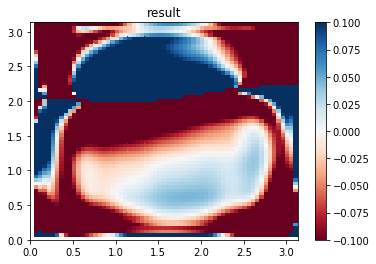

In [52]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
z = soln[p_r,0,...]
#z = rhs[p_r,...]
print(z.shape)
print(x.shape)
z = mod((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())))[p_r,0,...]
#z = mod((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())))[p_r,0,...] - soln[p_r,0,...]
z = tf.divide(mod((rhs, dx * tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())))[p_r,0,...] - soln[p_r,0,...], soln[p_r,0,...])
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
from conv_laplacian_loss import conv_laplacian_loss
cll = conv_laplacian_loss((ny,nx), dx)
#cll(tf.expand_dims(rhs, axis = 1), tf.expand_dims(soln, axis = 1))
cll(rhs,soln)

In [100]:
mod.compile(loss = lf, optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-5))

In [22]:
dx

0.008789778496342436

In [14]:
rhs.shape

TensorShape([100, 1, 128, 64])

In [6]:
r = (tf.random.uniform((100,1,67,96), dtype = tf.float64), 0.05 * tf.ones((100,1), dtype = tf.float64))
s = (tf.random.uniform((100,1,67,96), dtype = tf.float64), 0.05 * tf.ones((100,1), dtype = tf.float64))
Lp_integral_norm_batch(r,s)

<tf.Tensor: id=72203, shape=(), dtype=float64, numpy=2.72116787741319>

In [105]:
from importlib import reload
reload(Homogeneous_Poisson_NN)
mod = Homogeneous_Poisson_NN.Homogeneous_Poisson_NN_2(data_format = 'channels_first', Lp_norm_power=2)
nx1 = 100
nx2 = 100
dx = 0.01
Lx1 = 1.0
Lx2 = 1.0
batch_size = 1
mod((tf.random.uniform((10,1,74,83), dtype = tf.keras.backend.floatx()), dx*tf.ones((batch_size,1), dtype = tf.keras.backend.floatx())))
from IPython.display import clear_output
clear_output()
x = np.array(np.meshgrid(np.linspace(0, Lx1, nx1),np.linspace(0, Lx2, nx2),indexing = 'xy'), dtype = np.float64).transpose((1,2,0))
y = np.sin(x[:,:,0] - x[:,:,1])
mod.integral_loss_2(y, tf.zeros((batch_size,1,nx1,nx2), dtype = tf.float64)) #ttf.ones((batch_size,1,nx1,nx2), dtype = tf.float64)

(1, 2)
---data---
(1, 1, 100, 100)
---index combinations---
(20, 20, 4, 2)
---interp_pts---
(20, 20, 4, 1)
---quadweights---
tf.Tensor(
[[7.75633119e-05 1.78788469e-04 2.75976477e-04 3.66709280e-04
  4.48849465e-04 5.20469832e-04 5.79891154e-04 6.25720471e-04
  6.56883512e-04 6.72649813e-04 6.72649813e-04 6.56883512e-04
  6.25720471e-04 5.79891154e-04 5.20469832e-04 4.48849465e-04
  3.66709280e-04 2.75976477e-04 1.78788469e-04 7.75633119e-05]
 [1.78788469e-04 4.12119025e-04 6.36143693e-04 8.45288694e-04
  1.03462715e-03 1.19971675e-03 1.33668675e-03 1.44232630e-03
  1.51415913e-03 1.55050148e-03 1.55050148e-03 1.51415913e-03
  1.44232630e-03 1.33668675e-03 1.19971675e-03 1.03462715e-03
  8.45288694e-04 6.36143693e-04 4.12119025e-04 1.78788469e-04]
 [2.75976477e-04 6.36143693e-04 9.81946411e-04 1.30478099e-03
  1.59704235e-03 1.85187335e-03 2.06329918e-03 2.22636356e-03
  2.33724415e-03 2.39334192e-03 2.39334192e-03 2.33724415e-03
  2.22636356e-03 2.06329918e-03 1.85187335e-03 1.5970423

<tf.Tensor: id=946104, shape=(), dtype=float64, numpy=0.38204612888195494>

(100, 100)

In [104]:
lf = Lp_integral_norm([nx1,nx2], [0,Lx1,0,Lx2], n_quadpts=20, p = 2.0)
lf(y, tf.zeros((1,1,nx1,nx2), dtype = tf.float64))

[0.01761401 0.04060143 0.06267205 0.08327674 0.10193012 0.11819453
 0.13168864 0.14209611 0.14917299 0.15275339 0.15275339 0.14917299
 0.14209611 0.13168864 0.11819453 0.10193012 0.08327674 0.06267205
 0.04060143 0.01761401]
[0.5 0.5]
---data---
(100, 100, 1, 1)
---index combinations---
(20, 20, 4, 2)
---quadweights---
tf.Tensor(
[[7.75633119e-05 1.78788469e-04 2.75976477e-04 3.66709280e-04
  4.48849465e-04 5.20469832e-04 5.79891154e-04 6.25720471e-04
  6.56883512e-04 6.72649813e-04 6.72649813e-04 6.56883512e-04
  6.25720471e-04 5.79891154e-04 5.20469832e-04 4.48849465e-04
  3.66709280e-04 2.75976477e-04 1.78788469e-04 7.75633119e-05]
 [1.78788469e-04 4.12119025e-04 6.36143693e-04 8.45288694e-04
  1.03462715e-03 1.19971675e-03 1.33668675e-03 1.44232630e-03
  1.51415913e-03 1.55050148e-03 1.55050148e-03 1.51415913e-03
  1.44232630e-03 1.33668675e-03 1.19971675e-03 1.03462715e-03
  8.45288694e-04 6.36143693e-04 4.12119025e-04 1.78788469e-04]
 [2.75976477e-04 6.36143693e-04 9.81946411e-04

<tf.Tensor: id=929183, shape=(), dtype=float64, numpy=0.3820461288819584>

In [50]:
i = dataset_generator_2_rbg()
print(next(i))

((<tf.Tensor: id=3546663, shape=(200, 1, 120, 69), dtype=float64, numpy=
array([[[[ 0.84045724,  0.81368467,  0.78558265, ..., -0.13076901,
          -0.14837462, -0.16357844],
         [ 0.8085973 ,  0.78179162,  0.7534852 , ..., -0.10406169,
          -0.11942291, -0.1326621 ],
         [ 0.77454948,  0.74760936,  0.71896215, ..., -0.07340205,
          -0.08610965, -0.09702934],
         ...,
         [ 0.28107054,  0.27042851,  0.26098092, ..., -0.10538607,
          -0.15177625, -0.18997541],
         [ 0.28166855,  0.27174322,  0.2632169 , ..., -0.09809176,
          -0.14420833, -0.18208804],
         [ 0.28370473,  0.27434141,  0.26655056, ..., -0.09171168,
          -0.1375604 , -0.17513601]]],


       [[[ 0.60275823,  0.6109267 ,  0.62123793, ...,  0.25581462,
           0.25737733,  0.25815948],
         [ 0.60529005,  0.61218977,  0.62107793, ...,  0.25583302,
           0.25900226,  0.26121037],
         [ 0.60771822,  0.61328003,  0.6206704 , ...,  0.25555844,
          

In [54]:
from conv_laplacian_loss import conv_laplacian_loss
s = next(i)
cll = conv_laplacian_loss((s[0][0].shape[-2],s[0][0].shape[-1]), s[0][1][0,0])
cll(s[0][0], s[1])

<tf.Tensor: id=3576946, shape=(), dtype=float64, numpy=3.3931515309206384e-07>